In [11]:
#importing libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [3]:
# Load the California Housing dataset

california_housing = fetch_california_housing()

# Convert to DataFrame for easy manipulation
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target, name='MedHouseVal')


In [4]:
print(X.shape, '\n')
print(X.info())

(20640, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [5]:

california_housing = fetch_california_housing()
data = california_housing.data
feature_names = california_housing.feature_names

# Create a DataFrame from data and feature names
df = pd.DataFrame(data, columns=feature_names)

# Now you can use df for seaborn pairplot
#sns.pairplot(df)

<Axes: >

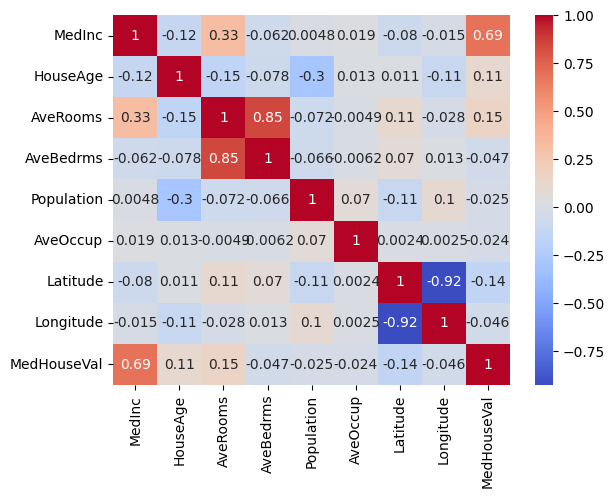

In [6]:
# Correlation heatmap
corr_matrix = X.join(y).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Preprocessing the Data

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Linear Regression Model


In [8]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MSE: 0.5558915986952442
MAE: 0.5332001304956565
RMSE: 0.7455813830127763
R^2: 0.575787706032451


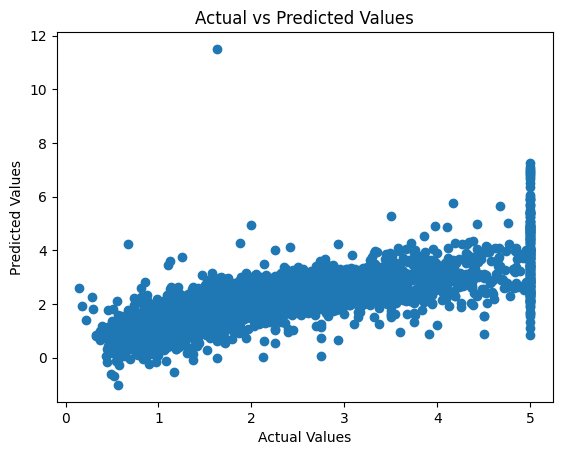

In [15]:
#Visualize the Results

# Plot Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


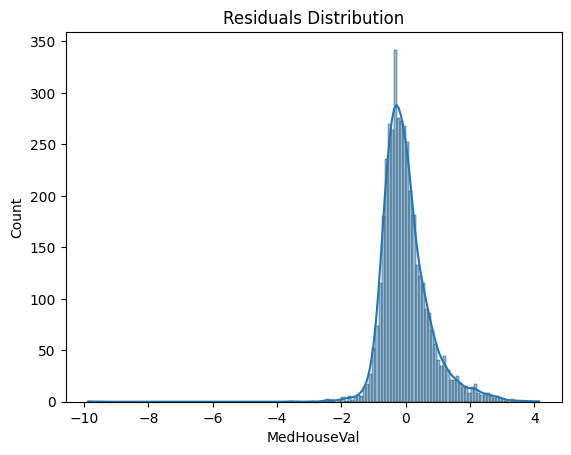

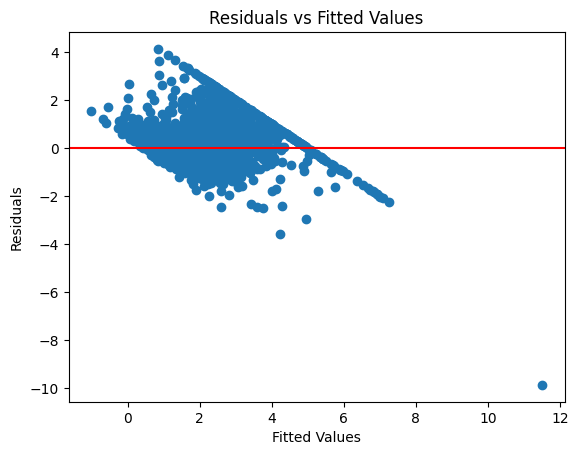

In [17]:
# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Residuals vs Fitted plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
